In [1]:
# 1. Instalar y cargar Kaggle, descomprimir el dataset
!pip install -q kaggle
from google.colab import files

# Subir kaggle.json con tus credenciales
uploaded = files.upload()

# Crear el directorio .kaggle y mover kaggle.json
!mkdir -p ~/.kaggle
!cp "{list(uploaded.keys())[0]}" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descargar y descomprimir el dataset CIFAR-10
!kaggle competitions download -c cifar-10
!unzip cifar-10.zip -d ./cifar-10

# Instalar librería para descomprimir .7z
!pip install py7zr
import py7zr

# Descomprimir las imágenes de entrenamiento
with py7zr.SevenZipFile('/content/cifar-10/train.7z', mode='r') as z:
    z.extractall(path='/content/cifar-10/train')

Saving kaggle.json to kaggle.json
100% 715M/715M [00:07<00:00, 55.1MB/s]
100% 715M/715M [00:07<00:00, 95.3MB/s]
Archive:  cifar-10.zip
  inflating: ./cifar-10/sampleSubmission.csv  
  inflating: ./cifar-10/test.7z      
  inflating: ./cifar-10/train.7z     
  inflating: ./cifar-10/trainLabels.csv  
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 31.3 MB/s eta 0:00:00


Imagen: 9580.png, Tamaño: 32x32
Imagen: 37019.png, Tamaño: 32x32
Imagen: 42143.png, Tamaño: 32x32
Imagen: 6580.png, Tamaño: 32x32
Imagen: 23896.png, Tamaño: 32x32


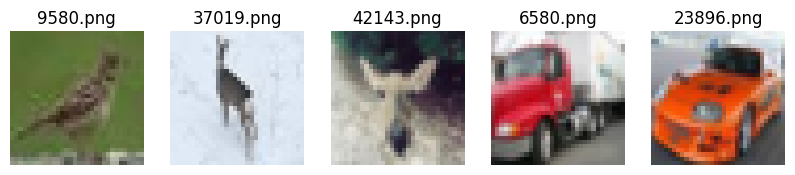

In [2]:
# 2. Hacer un muestreo del dataset para verificar su contenido y tamaño
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directorio de las imágenes
train_dir = '/content/cifar-10/train/train'

# Obtener una lista de archivos de imagen
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

# Seleccionar 5 imágenes aleatoriamente
random_images = random.sample(image_files, 5)

# Mostrar las imágenes y sus dimensiones
plt.figure(figsize=(10,5))
for i, image_file in enumerate(random_images):
    img = Image.open(os.path.join(train_dir, image_file))
    width, height = img.size
    print(f"Imagen: {image_file}, Tamaño: {width}x{height}")
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
plt.show()

# **Clases de CIFAR-10**
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [3]:
# 3. Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/cifar-10/train/train'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 50000


In [4]:
# 4. Análisis rápido de las etiquetas de trainLabels.csv
import pandas as pd

# Cargar el CSV
labels_df = pd.read_csv('/content/cifar-10/trainLabels.csv')

labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [5]:
print(labels_df.size)

100000


In [6]:
# 3. Crear listas de imágenes y etiquetas
from sklearn.model_selection import train_test_split
import shutil
import os

# Asegurarse de que el ID esté correctamente formateado para coincidir con los nombres de archivo

images = labels_df['id'].apply(lambda x: f'{x}.png').values
labels = labels_df['label'].values

# Dividir en entrenamientos y validación
train_imgs, val_imgs, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Crear las carpetas de entrenamiento y validación
train_path = '/content/dataset/train'
val_path = '/content/dataset/val'

# Crear caroetas por clase dentro de val y train
for label in labels_df["label"].unique():
  os.makedirs(os.path.join(train_path, label), exist_ok=True)
  os.makedirs(os.path.join(val_path, label), exist_ok=True)

train_count = 0
val_count = 0

# Mover las imágenes de entrenamiento
for img, label in zip(train_imgs, train_labels):
    img_src = f'/content/cifar-10/train/train/{img}'
    img_dst = os.path.join(train_path, str(label), img)
    if os.path.exists(img_src):  # Verificar si la imagen existe
        shutil.move(img_src, img_dst)
        train_count += 1

print(f'Número de imágenes movidas a entrenamiento: {train_count}')

# Mover las imágenes de validación
for img, label in zip(val_imgs, val_labels):
    img_src = f'/content/cifar-10/train/train/{img}'
    img_dst = os.path.join(val_path, str(label), img)
    if os.path.exists(img_src):  # Verificar si la imagen existe
        shutil.move(img_src, img_dst)
        val_count += 1

print(f'Número de imágenes movidas a validación: {val_count}')

Número de imágenes movidas a entrenamiento: 40000
Número de imágenes movidas a validación: 10000


In [7]:
# 3.1 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/airplane'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [8]:
# 3.2 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/cat'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [9]:
# 3.3 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/val/deer'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 1000


In [10]:
# 6. Verificar que las imágenes se han movido de forma exitosa a las carpetas
import os

def is_directory_empty(directory):
  return not os.listdir(directory)

directory_train =  "/content/dataset/train/airplane"

if is_directory_empty(directory_train):
  print("La carpeta está vacía para train.")
else:
  print("La carpeta no está vacía para train.")

directory_val =  "/content/dataset/val/airplane"

if is_directory_empty(directory_train):
  print("La carpeta está vacía para val.")
else:
  print("La carpeta no está vacía para val.")

La carpeta no está vacía para train.
La carpeta no está vacía para val.


In [11]:
# 3.1. Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/airplane'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [12]:
# 3.2 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/automobile'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [13]:
# 3.2 Tamaño de elementos para carpeta train
import os

# ruta de la carpeta
dir_path = r'/content/dataset/train/bird'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 4000


In [14]:
# 3.1. Tamaño de elementos para carpeta VAL
import os

# ruta de la carpeta
dir_path = r'/content/dataset/val/airplane'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 1000


In [15]:
### ENTRENAMIENTO DEL MODELO ####
# 7. Entrenar el modelo
!pip install ultralytics
from ultralytics import YOLO

# Cargar el modelo yolov8n-cls.pt para clasificación
model = YOLO('yolov8n-cls.pt')
# Entrenar el modelo con CIFAR-10
model.train(data='/content/dataset', epochs=20, imgsz=32)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 14.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 42.8MB/s]


Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=20, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

train: Scanning /content/dataset/train... 40000 images, 0 corrupt: 100%|██████████| 40000/40000 [00:09<00:00, 4331.88it/s]


train: New cache created: /content/dataset/train.cache


val: Scanning /content/dataset/val... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:02<00:00, 4249.67it/s]


val: New cache created: /content/dataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20         0G      2.524         16         32:   0%|          | 6/2500 [00:00<04:40,  8.90it/s]

       1/20         0G       2.67         16         32:   1%|          | 13/2500 [00:01<03:57, 10.48it/s]
100%|██████████| 755k/755k [00:00<00:00, 11.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.61it/s]

                   all      0.496      0.926



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.01it/s]


                   all      0.494      0.922

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 26.00it/s]

                   all      0.548      0.932



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.25it/s]

                   all      0.635      0.959



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.20it/s]

                   all      0.673      0.971



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.35it/s]

                   all      0.689      0.972



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:14<00:00, 21.49it/s]

                   all      0.703      0.975



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.65it/s]

                   all      0.715      0.979



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.47it/s]

                   all      0.726      0.978



      Epoch    GPU_mem       loss  Instances       Size


      10/20         0G      1.169         16         32: 100%|██████████| 2500/2500 [03:31<00:00, 11.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 24.85it/s]

                   all      0.733       0.98



      Epoch    GPU_mem       loss  Instances       Size


      11/20         0G      1.156         16         32: 100%|██████████| 2500/2500 [03:31<00:00, 11.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.46it/s]

                   all      0.738      0.981



      Epoch    GPU_mem       loss  Instances       Size


      12/20         0G      1.114         16         32: 100%|██████████| 2500/2500 [03:31<00:00, 11.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.14it/s]

                   all      0.741      0.984



      Epoch    GPU_mem       loss  Instances       Size


      13/20         0G      1.091         16         32: 100%|██████████| 2500/2500 [03:32<00:00, 11.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:11<00:00, 26.20it/s]


                   all      0.755      0.984

      Epoch    GPU_mem       loss  Instances       Size


      14/20         0G       1.06         16         32: 100%|██████████| 2500/2500 [03:33<00:00, 11.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.25it/s]

                   all      0.759      0.985



      Epoch    GPU_mem       loss  Instances       Size


      15/20         0G      1.032         16         32: 100%|██████████| 2500/2500 [03:33<00:00, 11.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 24.80it/s]

                   all      0.763      0.985



      Epoch    GPU_mem       loss  Instances       Size


      16/20         0G      1.007         16         32: 100%|██████████| 2500/2500 [03:31<00:00, 11.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.58it/s]

                   all      0.767      0.986



      Epoch    GPU_mem       loss  Instances       Size


      17/20         0G     0.9852         16         32: 100%|██████████| 2500/2500 [03:29<00:00, 11.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.64it/s]


                   all       0.77      0.986

      Epoch    GPU_mem       loss  Instances       Size


      18/20         0G     0.9512         16         32: 100%|██████████| 2500/2500 [03:31<00:00, 11.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 24.50it/s]

                   all      0.766      0.987



      Epoch    GPU_mem       loss  Instances       Size


      19/20         0G     0.9441         16         32: 100%|██████████| 2500/2500 [03:30<00:00, 11.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.57it/s]


                   all      0.769      0.987

      Epoch    GPU_mem       loss  Instances       Size


      20/20         0G     0.9252         16         32: 100%|██████████| 2500/2500 [03:30<00:00, 11.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:12<00:00, 25.93it/s]

                   all      0.762      0.987



20 epochs completed in 1.260 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 40000 images in 10 classes ✅ 
val: /content/dataset/val... found 10000 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:11<00:00, 28.02it/s]


                   all      0.769      0.987
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df92e1dd9c0>
curves: []
curves_results: []
fitness: 0.8781999945640564
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7689999938011169, 'metrics/accuracy_top5': 0.9873999953269958, 'fitness': 0.8781999945640564}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.000546574592590332, 'inference': 0.5518328905105591, 'loss': 7.674694061279298e-05, 'postprocess': 5.98907470703125e-05}
task: 'classify'
top1: 0.7689999938011169
top5: 0.9873999953269958

In [16]:
# 8. Visualizar los resultados de las gráficas YOLO
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ruta del directorio donde se encuentran las imágenes
directory = "/content/runs/classify/train"

# Listar todos los archivos en el directorio
files = os.listdir(directory)
print("Estos son los archivos de resultado de entrenamiento", files)

# Filtrar solo los archivos de imagen (extensiones comunes)
image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]

# Mostrar todas las imágenes
# Mostrar todas las imágenes
if image_files:
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)

        # Cargar la imagen
        image = Image.open(image_path)

        # Mostrar la imagen
        plt.figure()
        plt.imshow(image)
        plt.axis('off')  # Ocultar los ejes
        plt.title(image_file)  # Título con el nombre del archivo
    plt.show()
else:
    print("No se encontraron imágenes en la carpeta.")

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# 9. Predicción con imagen del dataset
import os
from PIL import Image

directory = "/content/dataset/train/airplane"

# Si la carpeta tiene imágenes, carga la primera imagen
image_path = os.path.join(directory, os.listdir(directory)[0])
image = Image.open(image_path)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()


0: 32x32 airplane 0.76, ship 0.19, bird 0.02, deer 0.01, truck 0.01, 10.3ms
Speed: 14.0ms preprocess, 10.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train2


In [18]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/rana.jpg

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/rana.jpg"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-09-30 22:27:41--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/rana.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107572 (105K) [image/jpeg]
Saving to: ‘rana.jpg’

rana.jpg            100%[===================>] 105.05K  --.-KB/s    in 0.03s   

2024-09-30 22:27:42 (3.10 MB/s) - ‘rana.jpg’ saved [107572/107572]


0: 32x32 frog 0.82, bird 0.14, deer 0.01, airplane 0.01, cat 0.01, 5.1ms
Speed: 16.9ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train3


In [20]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/cauto_test.jpg

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/cauto_test.jpg"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-09-30 22:32:47--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/cauto_test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350294 (342K) [image/jpeg]
Saving to: ‘cauto_test.jpg.1’

cauto_test.jpg.1    100%[===================>] 342.08K  --.-KB/s    in 0.06s   

2024-09-30 22:32:48 (5.70 MB/s) - ‘cauto_test.jpg.1’ saved [350294/350294]


0: 32x32 automobile 0.86, frog 0.05, airplane 0.04, truck 0.02, ship 0.01, 14.8ms
Speed: 14.0ms preprocess, 14.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train4


In [21]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa.jpeg

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/Pelusa.jpeg"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-09-30 22:34:33--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239195 (234K) [image/jpeg]
Saving to: ‘Pelusa.jpeg’

Pelusa.jpeg         100%[===================>] 233.59K  --.-KB/s    in 0.05s   

2024-09-30 22:34:34 (4.47 MB/s) - ‘Pelusa.jpeg’ saved [239195/239195]


0: 32x32 horse 0.52, cat 0.17, dog 0.13, deer 0.13, truck 0.02, 4.1ms
Speed: 18.1ms preprocess, 4.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train5


In [23]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato3.JPG

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/gato3.JPG"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-09-30 22:35:48--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato3.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88203 (86K) [image/jpeg]
Saving to: ‘gato3.JPG’

gato3.JPG           100%[===================>]  86.14K  --.-KB/s    in 0.03s   

2024-09-30 22:35:49 (2.52 MB/s) - ‘gato3.JPG’ saved [88203/88203]


0: 32x32 cat 0.46, dog 0.40, ship 0.04, horse 0.03, bird 0.03, 9.9ms
Speed: 16.0ms preprocess, 9.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train6


In [25]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Minicky.jpeg

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/Minicky.jpeg"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-09-30 22:36:43--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Minicky.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213012 (208K) [image/jpeg]
Saving to: ‘Minicky.jpeg’

Minicky.jpeg        100%[===================>] 208.02K  --.-KB/s    in 0.05s   

2024-09-30 22:36:43 (4.02 MB/s) - ‘Minicky.jpeg’ saved [213012/213012]


0: 32x32 cat 0.54, ship 0.22, frog 0.08, bird 0.05, airplane 0.04, 10.3ms
Speed: 26.7ms preprocess, 10.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train7


In [26]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa_zoom.png

# 10.1  Predicción con imagen de internet RANA
import os
from PIL import Image

directory = "/content/Pelusa_zoom.png"

image = Image.open(directory)

# Realizar la predicción con el modelo YOLO
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones
image.show()

--2024-09-30 22:37:28--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa_zoom.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443434 (433K) [image/png]
Saving to: ‘Pelusa_zoom.png’

Pelusa_zoom.png     100%[===================>] 433.04K  --.-KB/s    in 0.06s   

2024-09-30 22:37:29 (7.01 MB/s) - ‘Pelusa_zoom.png’ saved [443434/443434]


0: 32x32 cat 0.39, ship 0.23, frog 0.19, truck 0.09, automobile 0.03, 11.4ms
Speed: 4.0ms preprocess, 11.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/train8


In [27]:
# 11. Validar el modelo
from ultralytics import YOLO

# Cargar el modelo
model = YOLO("/content/runs/classify/train/weights/best.pt")

# Validar el modelo
metrics = model.val()

# Acceder a las métricas de clasificación
print(f"Top-1 Accuracy: {metrics.top1}")
print(f"Top-5 Accuracy: {metrics.top5}")
print(f"Fitness: {metrics.fitness}")

# Si quieres ver todas las métricas disponibles
print("\nTodas las métricas:")
for key, value in metrics.results_dict.items():
    print(f"{key}: {value}")

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 40000 images in 10 classes ✅ 
val: /content/dataset/val... found 10000 images in 10 classes ✅ 
test: None...


val: Scanning /content/dataset/val... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:17<00:00, 35.73it/s]


                   all      0.769      0.987
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
Top-1 Accuracy: 0.7689999938011169
Top-5 Accuracy: 0.9873999953269958
Fitness: 0.8781999945640564

Todas las métricas:
metrics/accuracy_top1: 0.7689999938011169
metrics/accuracy_top5: 0.9873999953269958
fitness: 0.8781999945640564


In [29]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa.jpeg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 horse 0.52, cat 0.17, dog 0.13, deer 0.13, truck 0.02, 16.8ms
Speed: 54.0ms preprocess, 16.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict
Clase: horse, Confianza: 0.52
airplane: 0.0074
automobile: 0.0071
bird: 0.0105
cat: 0.1721
deer: 0.1278
dog: 0.1334
frog: 0.0027
horse: 0.5219
ship: 0.0014
truck: 0.0158


In [30]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa_zoom.png'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 cat 0.39, ship 0.23, frog 0.19, truck 0.09, automobile 0.03, 7.1ms
Speed: 8.2ms preprocess, 7.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict2
Clase: cat, Confianza: 0.39
airplane: 0.0073
automobile: 0.0257
bird: 0.0222
cat: 0.3892
deer: 0.0095
dog: 0.0192
frog: 0.1932
horse: 0.0111
ship: 0.2289
truck: 0.0936


In [31]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/cauto_test.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 automobile 0.86, frog 0.05, airplane 0.04, truck 0.02, ship 0.01, 5.6ms
Speed: 11.0ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict3
Clase: automobile, Confianza: 0.86
airplane: 0.0368
automobile: 0.8617
bird: 0.0058
cat: 0.0001
deer: 0.0077
dog: 0.0007
frog: 0.0527
horse: 0.0005
ship: 0.0128
truck: 0.0210


In [32]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/rana.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 frog 0.82, bird 0.14, deer 0.01, airplane 0.01, cat 0.01, 7.3ms
Speed: 30.0ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict4
Clase: frog, Confianza: 0.82
airplane: 0.0127
automobile: 0.0012
bird: 0.1381
cat: 0.0060
deer: 0.0146
dog: 0.0020
frog: 0.8218
horse: 0.0019
ship: 0.0008
truck: 0.0011


In [33]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/gato3.JPG'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 cat 0.46, dog 0.40, ship 0.04, horse 0.03, bird 0.03, 16.5ms
Speed: 20.8ms preprocess, 16.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict5
Clase: cat, Confianza: 0.46
airplane: 0.0024
automobile: 0.0013
bird: 0.0309
cat: 0.4612
deer: 0.0193
dog: 0.4018
frog: 0.0056
horse: 0.0331
ship: 0.0401
truck: 0.0044


In [34]:
import os
from PIL import Image
from ultralytics import YOLO  # Asegúrate de importar YOLO si no lo has hecho ya

# Ruta del modelo YOLO
model_path = r'/content/runs/classify/train/weights/best.pt'

# Cargar el modelo YOLO
model = YOLO(model_path)

# Ruta de la imagen local
image_path = r'/content/Minicky.jpeg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Realizar la predicción con el modelo YOLO usando predict() y un umbral de confianza de 0.25
results = model.predict(image, conf=0.25, save=True)

# Mostrar la imagen con las predicciones (si se ha guardado o procesado)
image.show()

# Procesar y mostrar los resultados de la predicción
for result in results:
    names = result.names  # Nombres de las clases
    top_class = result.probs.top1  # Índice de la clase con mayor probabilidad
    top_confidence = result.probs.top1conf.item()  # Probabilidad de la clase con mayor probabilidad

    print(f"Clase: {names[top_class]}, Confianza: {top_confidence:.2f}")

    # Si quieres mostrar todas las probabilidades:
    for i, prob in enumerate(result.probs.data):
        print(f"{names[i]}: {prob:.4f}")


0: 32x32 cat 0.54, ship 0.22, frog 0.08, bird 0.05, airplane 0.04, 11.9ms
Speed: 35.5ms preprocess, 11.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict6
Clase: cat, Confianza: 0.54
airplane: 0.0412
automobile: 0.0220
bird: 0.0521
cat: 0.5372
deer: 0.0090
dog: 0.0252
frog: 0.0829
horse: 0.0060
ship: 0.2188
truck: 0.0057


In [35]:
# 14. Exportar modelo a onnx
from ultralytics import YOLO

model = YOLO(r'/content/runs/classify/train/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx', opset=12, simplify=True)

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 32, 32) BCHW and output shape(s) (1, 10) (2.8 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 205.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 199.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 174.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 221.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.5s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun comma

'/content/runs/classify/train/weights/best.onnx'

In [36]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/cauto_test.jpg'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: automobile con probabilidad 0.48
airplane: 0.1954
automobile: 0.4841
bird: 0.0154
cat: 0.0129
deer: 0.0179
dog: 0.0037
frog: 0.0310
horse: 0.0041
ship: 0.0523
truck: 0.1832


In [37]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/rana.jpg'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: frog con probabilidad 0.62
airplane: 0.0104
automobile: 0.0034
bird: 0.2915
cat: 0.0205
deer: 0.0387
dog: 0.0075
frog: 0.6178
horse: 0.0062
ship: 0.0007
truck: 0.0034


In [38]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa.jpeg'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: horse con probabilidad 0.30
airplane: 0.1914
automobile: 0.0304
bird: 0.0241
cat: 0.1396
deer: 0.0791
dog: 0.0640
frog: 0.0028
horse: 0.3022
ship: 0.0166
truck: 0.1498


In [39]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa_zoom.png'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: cat con probabilidad 0.44
airplane: 0.0071
automobile: 0.0221
bird: 0.0277
cat: 0.4395
deer: 0.0101
dog: 0.0287
frog: 0.1844
horse: 0.0172
ship: 0.1958
truck: 0.0675


In [40]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/Minicky.jpeg'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: frog con probabilidad 0.28
airplane: 0.0874
automobile: 0.0174
bird: 0.1458
cat: 0.1666
deer: 0.0172
dog: 0.0085
frog: 0.2850
horse: 0.0043
ship: 0.2647
truck: 0.0029


In [41]:
import onnxruntime as ort
from PIL import Image
import numpy as np
import os

# Ruta del modelo ONNX exportado
onnx_model_path = r'/content/runs/classify/train/weights/best.onnx'

# Cargar el modelo ONNX usando onnxruntime
session = ort.InferenceSession(onnx_model_path)

# Ruta de la imagen local
image_path = r'/content/gato3.JPG'  # Cambia esto a la ruta real de tu imagen

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Redimensionar la imagen al tamaño adecuado para CIFAR-10 (32x32)
image = image.resize((32, 32))

# Convertir la imagen a un array numpy y escalar los valores de píxeles
image_np = np.array(image).astype(np.float32) / 255.0

# Cambiar el formato de la imagen a (1, 3, 32, 32) -> (batch_size, canales, alto, ancho)
image_np = np.transpose(image_np, (2, 0, 1))  # Cambiar los ejes para que esté en formato canales primero
image_np = np.expand_dims(image_np, axis=0)   # Añadir la dimensión de batch_size

# Realizar la predicción con el modelo ONNX
input_name = session.get_inputs()[0].name  # Obtener el nombre del primer input del modelo
output_name = session.get_outputs()[0].name  # Obtener el nombre del primer output del modelo
results = session.run([output_name], {input_name: image_np})

# Procesar los resultados de la predicción
predicciones = results[0][0]  # Acceder a las predicciones de la primera imagen
clase_detectada = np.argmax(predicciones)  # Obtener la clase con mayor probabilidad
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Primera opción detectada: cat con probabilidad 0.40
airplane: 0.0318
automobile: 0.0027
bird: 0.1220
cat: 0.4019
deer: 0.0701
dog: 0.1703
frog: 0.0168
horse: 0.0888
ship: 0.0424
truck: 0.0532


In [42]:
# Crear modelo en TorchScript

model = YOLO(r'/content/runs/classify/train/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='torchscript', opset=12, simplify=True)

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 32, 32) BCHW and output shape(s) (1, 10) (2.8 MB)

TorchScript: starting export with torch 2.4.1+cu121...
TorchScript: export success ✅ 1.7s, saved as '/content/runs/classify/train/weights/best.torchscript' (5.7 MB)

Export complete (2.0s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=/content/runs/classify/train/weights/best.torchscript imgsz=32  
Validate:        yolo val task=classify model=/content/runs/classify/train/weights/best.torchscript imgsz=32 data=/content/dataset  
Visualize:       https://netron.app


'/content/runs/classify/train/weights/best.torchscript'

In [43]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/Minicky.jpeg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.10504    0.013874    0.027439     0.56024    0.041749     0.20344    0.034528   0.0090284   0.0033908   0.0012658]
Primera opción detectada: cat con probabilidad 0.56
airplane: 0.1050
automobile: 0.0139
bird: 0.0274
cat: 0.5602
deer: 0.0417
dog: 0.2034
frog: 0.0345
horse: 0.0090
ship: 0.0034
truck: 0.0013


In [44]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/rana.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.77726   0.0049556     0.01801     0.12602   0.0024344    0.055951   0.0011027   0.0087157    0.001655   0.0038966]
Primera opción detectada: airplane con probabilidad 0.78
airplane: 0.7773
automobile: 0.0050
bird: 0.0180
cat: 0.1260
deer: 0.0024
dog: 0.0560
frog: 0.0011
horse: 0.0087
ship: 0.0017
truck: 0.0039


In [45]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/cauto_test.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.63165   0.0026282    0.045723     0.19616    0.006656    0.093664    0.013086   0.0048382   0.0046807  0.00091656]
Primera opción detectada: airplane con probabilidad 0.63
airplane: 0.6317
automobile: 0.0026
bird: 0.0457
cat: 0.1962
deer: 0.0067
dog: 0.0937
frog: 0.0131
horse: 0.0048
ship: 0.0047
truck: 0.0009


In [49]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa.jpeg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.12877   0.0068826    0.028877     0.16636     0.01615     0.17551   0.0034019     0.45025    0.011753    0.012043]
Primera opción detectada: horse con probabilidad 0.45
airplane: 0.1288
automobile: 0.0069
bird: 0.0289
cat: 0.1664
deer: 0.0161
dog: 0.1755
frog: 0.0034
horse: 0.4502
ship: 0.0118
truck: 0.0120


In [47]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/cauto_test.jpg'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.63165   0.0026282    0.045723     0.19616    0.006656    0.093664    0.013086   0.0048382   0.0046807  0.00091656]
Primera opción detectada: airplane con probabilidad 0.63
airplane: 0.6317
automobile: 0.0026
bird: 0.0457
cat: 0.1962
deer: 0.0067
dog: 0.0937
frog: 0.0131
horse: 0.0048
ship: 0.0047
truck: 0.0009


In [50]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/Pelusa_zoom.png'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.51649    0.003986    0.073094     0.29354    0.012327    0.065598    0.014952     0.01254    0.003231   0.0042442]
Primera opción detectada: airplane con probabilidad 0.52
airplane: 0.5165
automobile: 0.0040
bird: 0.0731
cat: 0.2935
deer: 0.0123
dog: 0.0656
frog: 0.0150
horse: 0.0125
ship: 0.0032
truck: 0.0042


In [51]:
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Cargar el modelo TorchScript
torchscript_model_path = r'/content/runs/classify/train/weights/best.torchscript'
torchscript_model = torch.jit.load(torchscript_model_path)

# Ruta de la imagen local
image_path = r'/content/gato3.JPG'

# Cargar la imagen desde el sistema de archivos
image = Image.open(image_path)

# Verificar si la imagen está en RGB, y convertir si es necesario
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocesar la imagen: redimensionar, convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar al tamaño requerido (CIFAR-10 usa 32x32)
    transforms.ToTensor(),        # Convertir la imagen a un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalización (esto depende de cómo se entrenó tu modelo)
])

# Aplicar las transformaciones a la imagen
image_tensor = transform(image)

# Añadir una dimensión adicional para representar el batch (batch_size=1)
image_tensor = image_tensor.unsqueeze(0)

# Pasar la imagen a través del modelo TorchScript
with torch.no_grad():  # Desactiva el cálculo de gradientes para la inferencia
    results = torchscript_model(image_tensor)

# Verificar la forma del tensor de predicciones
print(f"Forma de las predicciones: {results.shape}")

# Acceder a las predicciones de la primera imagen (ajusta según la forma del tensor)
predicciones = results[0].numpy() if results.dim() > 1 else results.numpy()

# Verificar si las predicciones tienen el formato correcto
print(f"Predicciones (primera imagen): {predicciones}")

# Obtener la clase con mayor probabilidad
clase_detectada = np.argmax(predicciones)
probabilidad = np.max(predicciones)

# Nombres de las clases del CIFAR-10
clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar la primera opción detectada
print(f"Primera opción detectada: {clases[clase_detectada]} con probabilidad {probabilidad:.2f}")

# Si quieres ver todas las probabilidades
for i, prob in enumerate(predicciones):
    print(f"{clases[i]}: {prob:.4f}")

Forma de las predicciones: torch.Size([1, 10])
Predicciones (primera imagen): [    0.32461    0.014862     0.31413     0.20247    0.015216    0.050771   0.0071838    0.021125    0.024379    0.025253]
Primera opción detectada: airplane con probabilidad 0.32
airplane: 0.3246
automobile: 0.0149
bird: 0.3141
cat: 0.2025
deer: 0.0152
dog: 0.0508
frog: 0.0072
horse: 0.0211
ship: 0.0244
truck: 0.0253
